In [26]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

In [36]:
# Load the provided CSV file to check its contents
file_path = r'C:\Users\EvangelosNiklitsiost\OneDrive - IreckonU\Desktop\Credit Risk Project\Dataset\cc_approvals_modified.csv'
credit_data = pd.read_csv(file_path)

# Step 1: Identify missing values in the dataset
missing_values = credit_data.isnull().sum()

# Show missing values per column before handling
missing_values


Gender               0
Age                 12
Debt                 0
MaritalStatus        0
EmploymentStatus     0
EducationLevel       0
HousingStatus        0
YearsEmployed        0
HasCreditCard        0
HasMortgage          0
CreditScore          0
HasOtherLoans        0
ResidentialArea      0
ID_code             13
CreditBalance        0
ApprovalStatus       0
dtype: int64

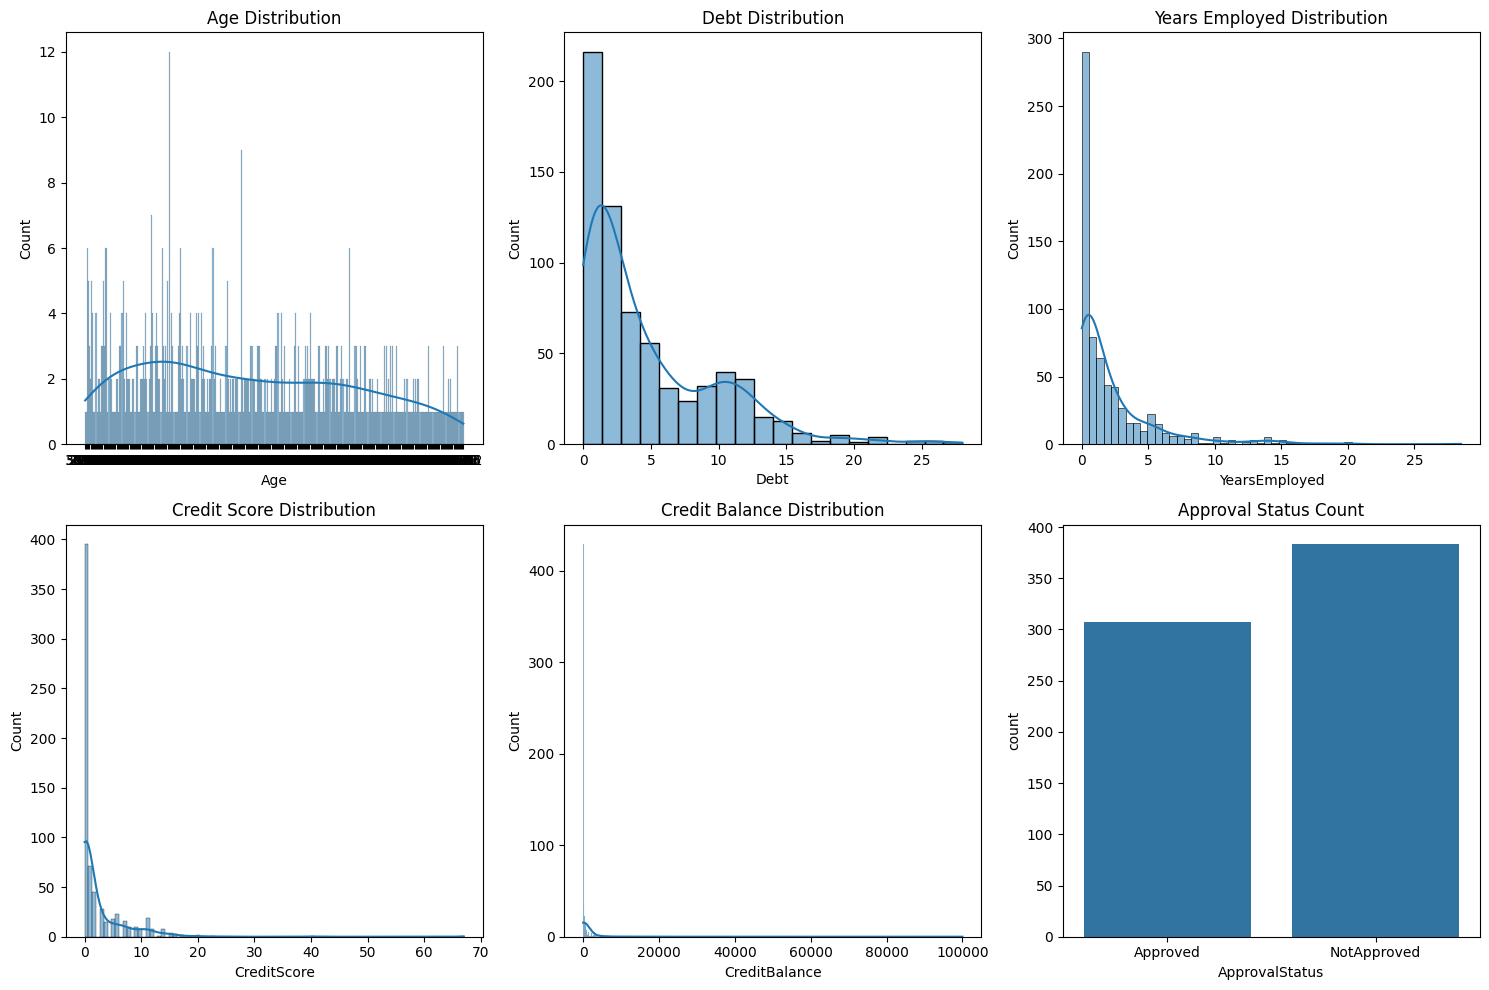

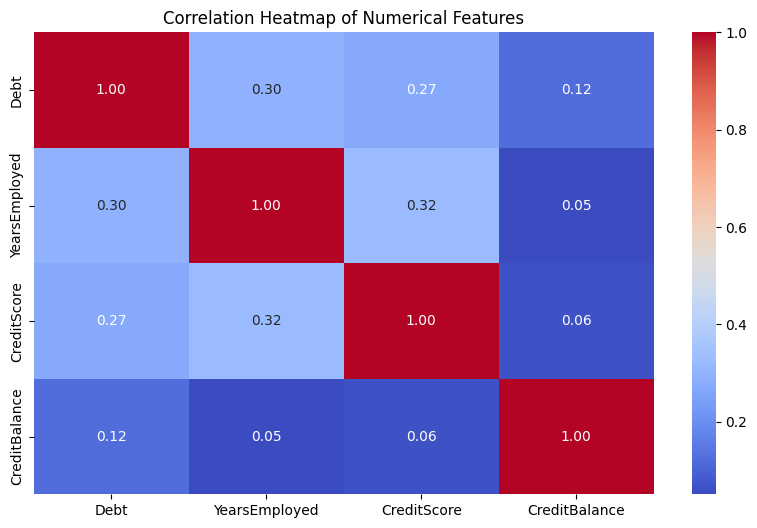

,Debt,YearsEmployed,CreditScore,CreditBalance
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [28]:
# Separate numerical and categorical columns
numerical_cols = credit_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = credit_data.select_dtypes(include=['object']).columns

# Checking basic statistics
eda_summary = credit_data.describe()

# Plot distribution of numerical columns
plt.figure(figsize=(15, 10))

# Age distribution
plt.subplot(2, 3, 1)
sns.histplot(credit_data['Age'], kde=True)
plt.title('Age Distribution')

# Debt distribution
plt.subplot(2, 3, 2)
sns.histplot(credit_data['Debt'], kde=True)
plt.title('Debt Distribution')

# Years Employed distribution
plt.subplot(2, 3, 3)
sns.histplot(credit_data['YearsEmployed'], kde=True)
plt.title('Years Employed Distribution')

# Credit Score distribution
plt.subplot(2, 3, 4)
sns.histplot(credit_data['CreditScore'], kde=True)
plt.title('Credit Score Distribution')

# Credit Balance distribution
plt.subplot(2, 3, 5)
sns.histplot(credit_data['CreditBalance'], kde=True)
plt.title('Credit Balance Distribution')

# Approval Status Count Plot
plt.subplot(2, 3, 6)
sns.countplot(x=credit_data['ApprovalStatus'])
plt.title('Approval Status Count')

plt.tight_layout()
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(credit_data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

eda_summary


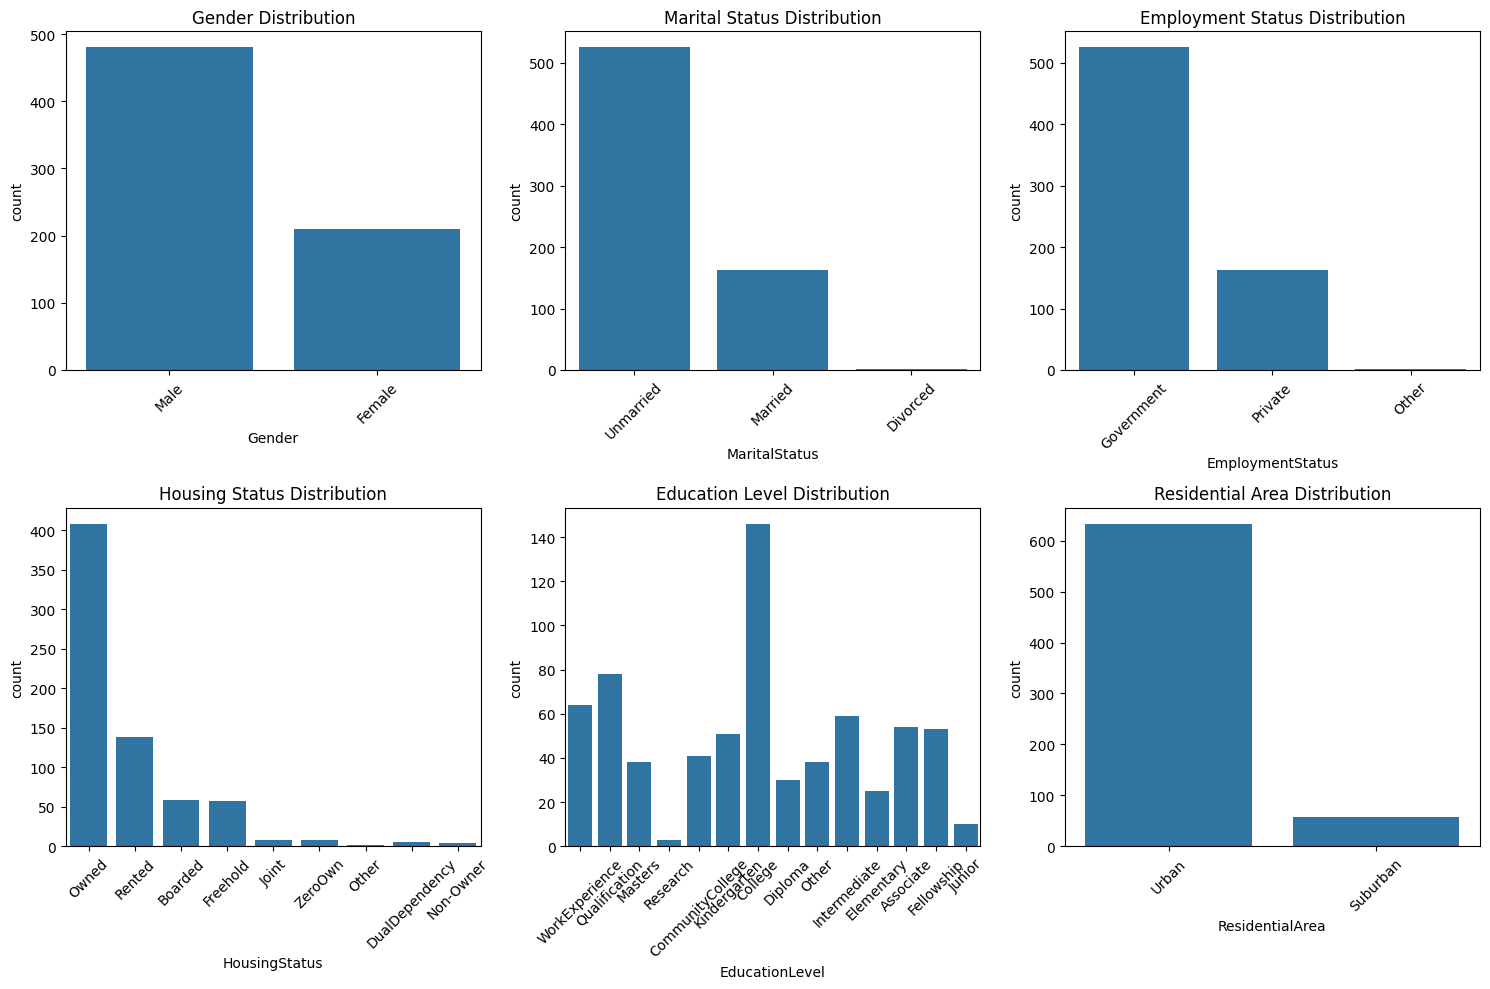

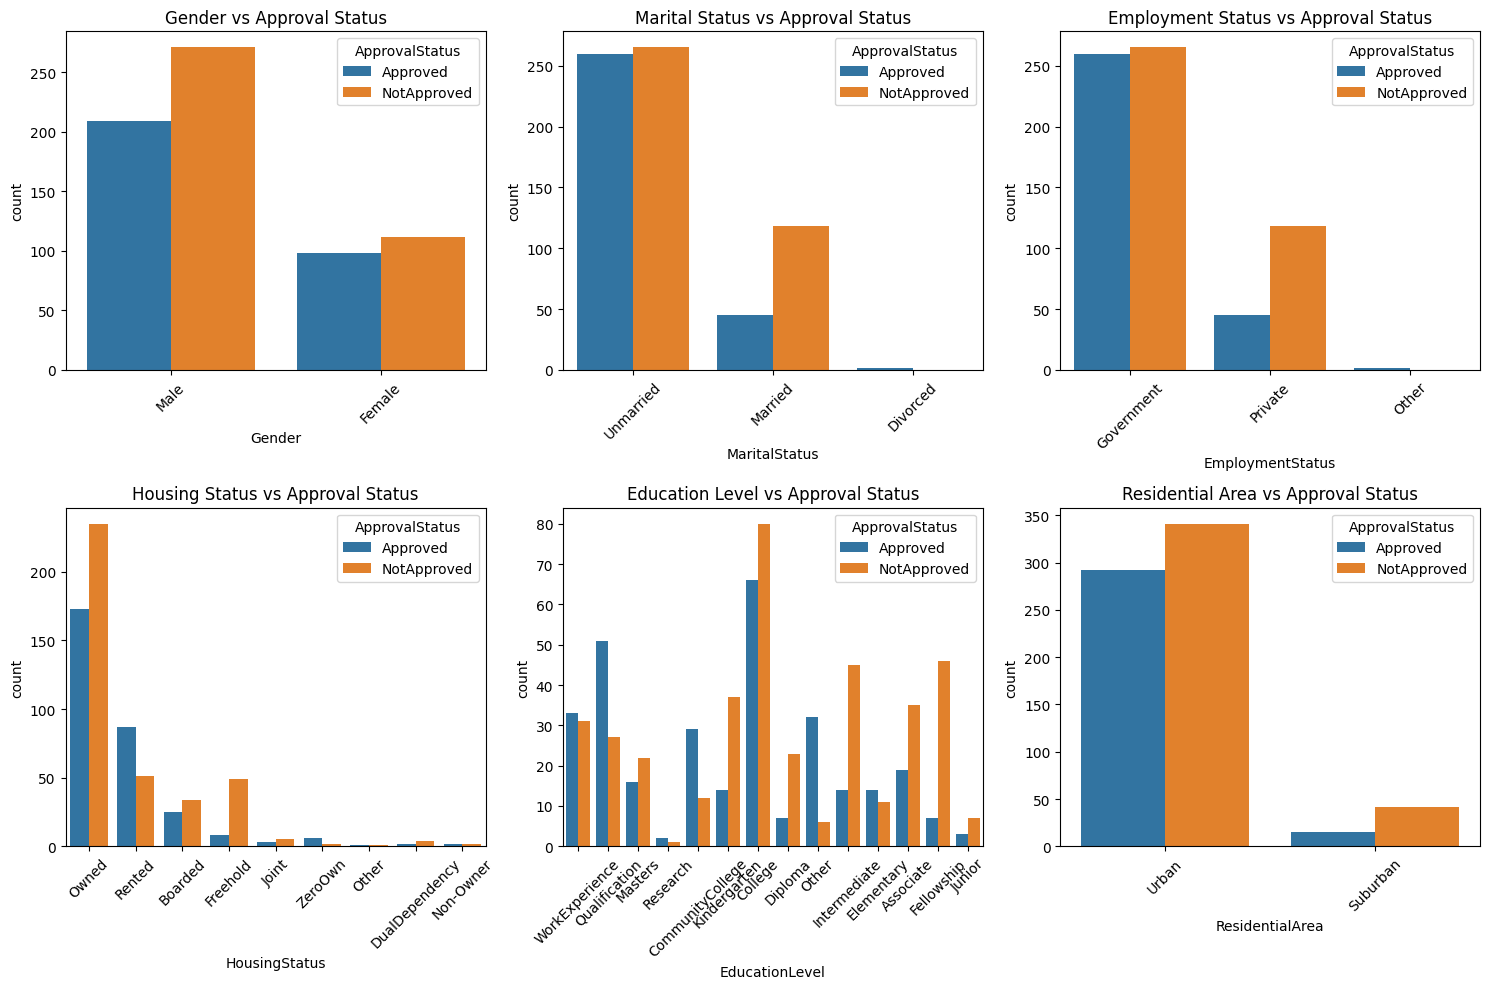

In [29]:
# Distribution of Categorical Variables with improved x-axis labels
plt.figure(figsize=(15, 10))

# Gender Distribution
plt.subplot(2, 3, 1)
sns.countplot(x=credit_data['Gender'])
plt.title('Gender Distribution')
plt.xticks(rotation=45)

# Marital Status Distribution
plt.subplot(2, 3, 2)
sns.countplot(x=credit_data['MaritalStatus'])
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)

# Employment Status Distribution
plt.subplot(2, 3, 3)
sns.countplot(x=credit_data['EmploymentStatus'])
plt.title('Employment Status Distribution')
plt.xticks(rotation=45)

# Housing Status Distribution
plt.subplot(2, 3, 4)
sns.countplot(x=credit_data['HousingStatus'])
plt.title('Housing Status Distribution')
plt.xticks(rotation=45)

# Education Level Distribution
plt.subplot(2, 3, 5)
sns.countplot(x=credit_data['EducationLevel'])
plt.title('Education Level Distribution')
plt.xticks(rotation=45)

# Residential Area Distribution
plt.subplot(2, 3, 6)
sns.countplot(x=credit_data['ResidentialArea'])
plt.title('Residential Area Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Bivariate Analysis: Categorical Features vs ApprovalStatus with improved x-axis labels
plt.figure(figsize=(15, 10))

# Gender vs ApprovalStatus
plt.subplot(2, 3, 1)
sns.countplot(x=credit_data['Gender'], hue=credit_data['ApprovalStatus'])
plt.title('Gender vs Approval Status')
plt.xticks(rotation=45)

# Marital Status vs ApprovalStatus
plt.subplot(2, 3, 2)
sns.countplot(x=credit_data['MaritalStatus'], hue=credit_data['ApprovalStatus'])
plt.title('Marital Status vs Approval Status')
plt.xticks(rotation=45)

# Employment Status vs ApprovalStatus
plt.subplot(2, 3, 3)
sns.countplot(x=credit_data['EmploymentStatus'], hue=credit_data['ApprovalStatus'])
plt.title('Employment Status vs Approval Status')
plt.xticks(rotation=45)

# Housing Status vs ApprovalStatus
plt.subplot(2, 3, 4)
sns.countplot(x=credit_data['HousingStatus'], hue=credit_data['ApprovalStatus'])
plt.title('Housing Status vs Approval Status')
plt.xticks(rotation=45)

# Education Level vs ApprovalStatus
plt.subplot(2, 3, 5)
sns.countplot(x=credit_data['EducationLevel'], hue=credit_data['ApprovalStatus'])
plt.title('Education Level vs Approval Status')
plt.xticks(rotation=45)

# Residential Area vs ApprovalStatus
plt.subplot(2, 3, 6)
sns.countplot(x=credit_data['ResidentialArea'], hue=credit_data['ApprovalStatus'])
plt.title('Residential Area vs Approval Status')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



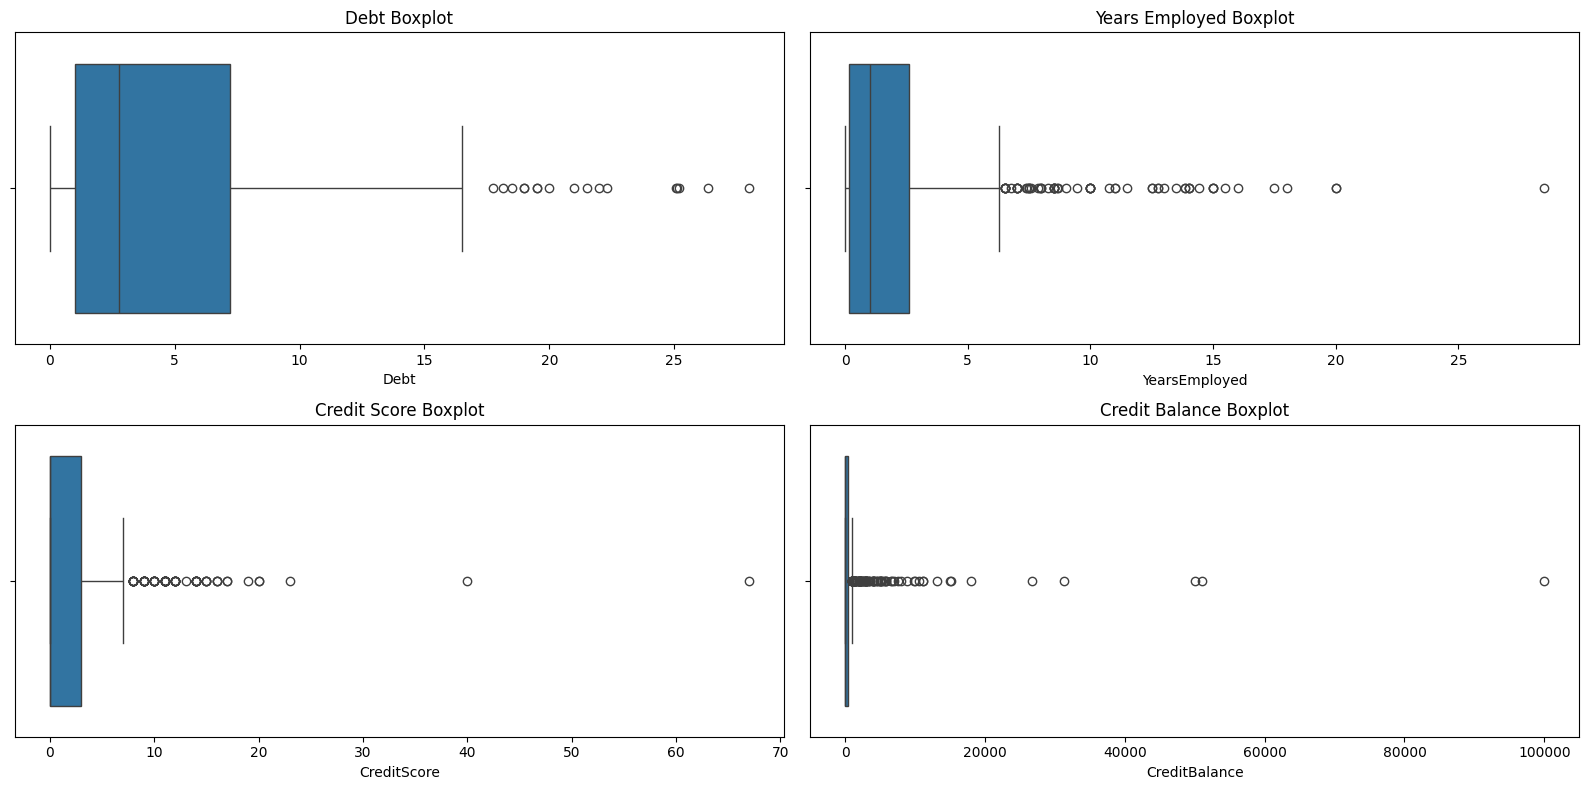

{'Debt': 0, 'Years Employed': 1, 'Credit Score': 2, 'Credit Balance': 12}

In [30]:
# Visualizing outliers using boxplots for numerical features
plt.figure(figsize=(16, 8))

# Boxplot for Debt
plt.subplot(2, 2, 1)
sns.boxplot(x=credit_data['Debt'])
plt.title('Debt Boxplot')

# Boxplot for Years Employed
plt.subplot(2, 2, 2)
sns.boxplot(x=credit_data['YearsEmployed'])
plt.title('Years Employed Boxplot')

# Boxplot for Credit Score
plt.subplot(2, 2, 3)
sns.boxplot(x=credit_data['CreditScore'])
plt.title('Credit Score Boxplot')

# Boxplot for Credit Balance
plt.subplot(2, 2, 4)
sns.boxplot(x=credit_data['CreditBalance'])
plt.title('Credit Balance Boxplot')

plt.tight_layout()
plt.show()

# Detecting outliers using the IQR method

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detecting outliers for each numerical column
outliers_debt = detect_outliers_iqr(credit_data, 'Debt')
outliers_years_employed = detect_outliers_iqr(credit_data, 'YearsEmployed')
outliers_credit_score = detect_outliers_iqr(credit_data, 'CreditScore')
outliers_credit_balance = detect_outliers_iqr(credit_data, 'CreditBalance')

# Summary of outliers
outliers_summary = {
    'Debt': len(outliers_debt),
    'Years Employed': len(outliers_years_employed),
    'Credit Score': len(outliers_credit_score),
    'Credit Balance': len(outliers_credit_balance)
}

outliers_summary


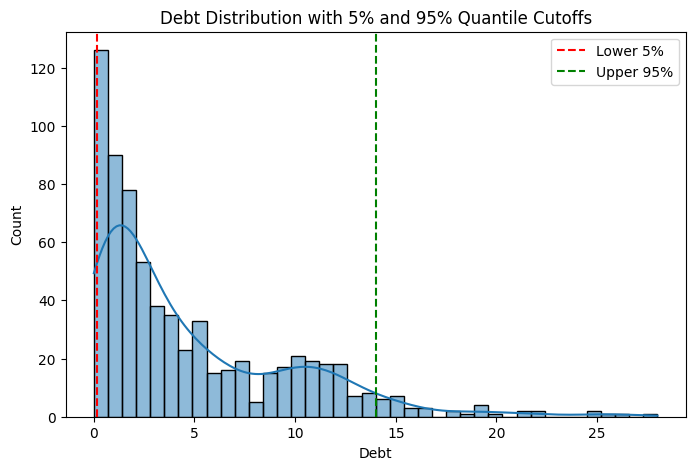

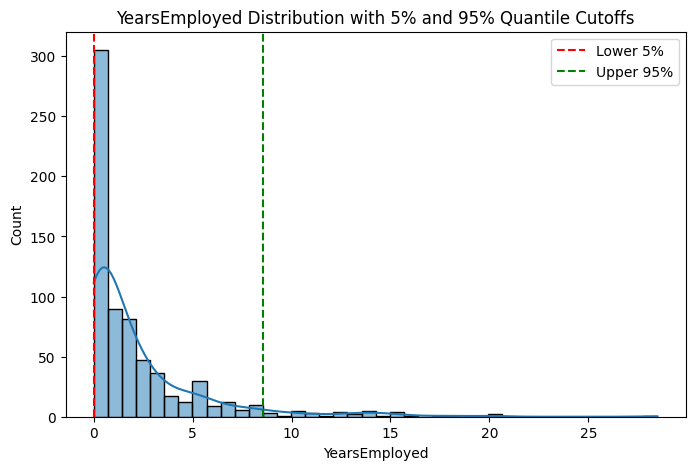

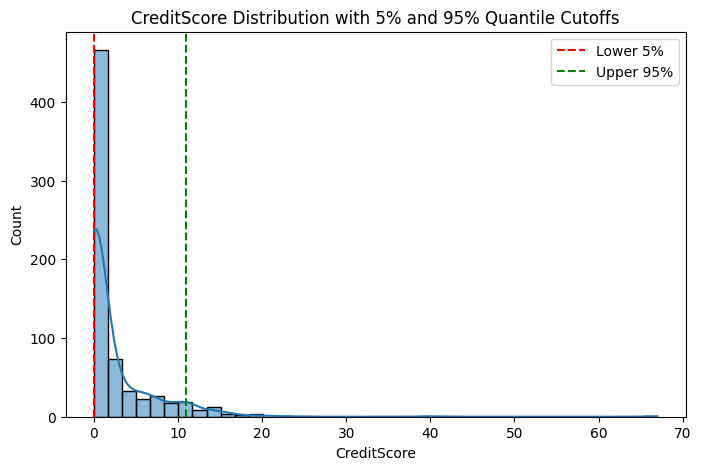

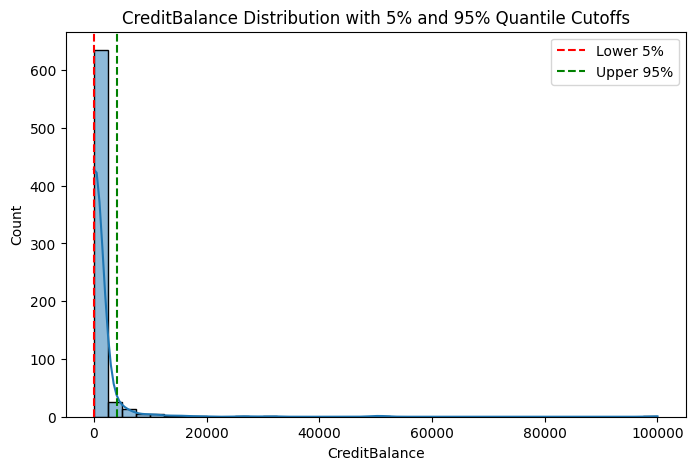

In [33]:
def plot_quantile_cutoffs(df, column, lower_quantile=0.05, upper_quantile=0.95):
    # Calculate the quantile values
    lower_bound = df[column].quantile(lower_quantile)
    upper_bound = df[column].quantile(upper_quantile)
    
    # Plot histogram with quantile cutoffs
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=40, kde=True)
    plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower {lower_quantile:.0%}')
    plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper {upper_quantile:.0%}')
    plt.title(f'{column} Distribution with {lower_quantile:.0%} and {upper_quantile:.0%} Quantile Cutoffs')
    plt.legend()
    plt.show()

# Display quantile cutoffs for Debt, Years Employed, Credit Score, and Credit Balance
plot_quantile_cutoffs(credit_data, 'Debt')
plot_quantile_cutoffs(credit_data, 'YearsEmployed')
plot_quantile_cutoffs(credit_data, 'CreditScore')
plot_quantile_cutoffs(credit_data, 'CreditBalance')


In [31]:
# Map ApprovalStatus to binary values: 'Approved' = 1, 'NotApproved' = 0
credit_data['ApprovalStatus_binary'] = credit_data['ApprovalStatus'].map({'Approved': 1, 'NotApproved': 0})

# Correlation between numerical features and ApprovalStatus using Point Biserial Correlation
numerical_features = ['Debt', 'YearsEmployed', 'CreditScore', 'CreditBalance']
correlations = {}

for feature in numerical_features:
    correlation, p_value = pointbiserialr(credit_data[feature], credit_data['ApprovalStatus_binary'])
    correlations[feature] = correlation

correlations


{'Debt': 0.20629373864503892,
 'YearsEmployed': 0.32247535825538465,
 'CreditScore': 0.4064100087639547,
 'CreditBalance': 0.1756572009935051}

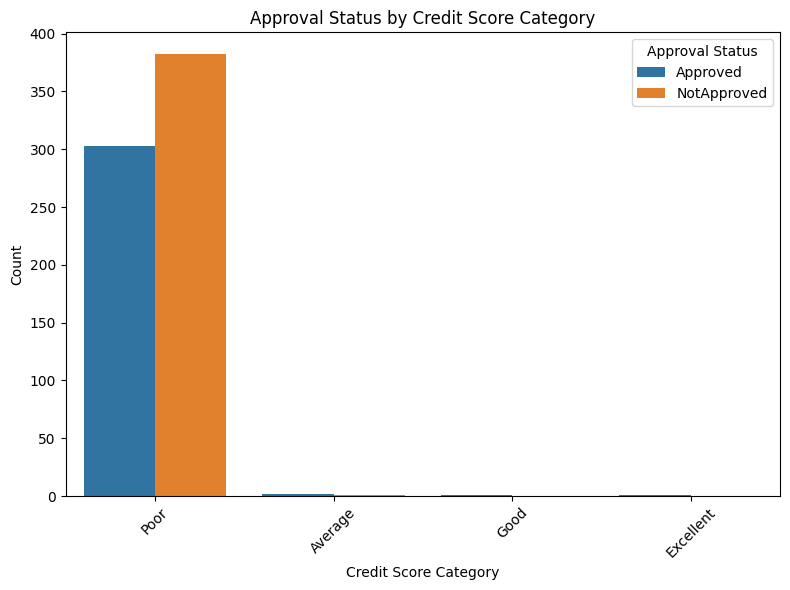

In [34]:
# Binning the Credit Score into categories
# Define the bins as follows:
# - Poor: 0-20
# - Average: 21-40
# - Good: 41-60
# - Excellent: 61-100

bins = [0, 20, 40, 60, 100]
labels = ['Poor', 'Average', 'Good', 'Excellent']

# Create a new column for Credit Score bins
credit_data['CreditScoreCategory'] = pd.cut(credit_data['CreditScore'], bins=bins, labels=labels, right=False)

# Plot the distribution of CreditScoreCategory
plt.figure(figsize=(8, 6))
sns.countplot(x=credit_data['CreditScoreCategory'], hue=credit_data['ApprovalStatus'])
plt.title('Approval Status by Credit Score Category')
plt.xlabel('Credit Score Category')
plt.ylabel('Count')
plt.legend(title='Approval Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Poor (Credit Score 0-20): A large number of applications fall into this category, and the majority of them are not approved.

Average (Credit Score 21-40): There is a more balanced approval and rejection rate, though rejections still dominate.

Good (Credit Score 41-60): The number of approvals is noticeably higher in this category compared to previous ones.

Excellent (Credit Score 61-100): Almost all applications in this category are approved.

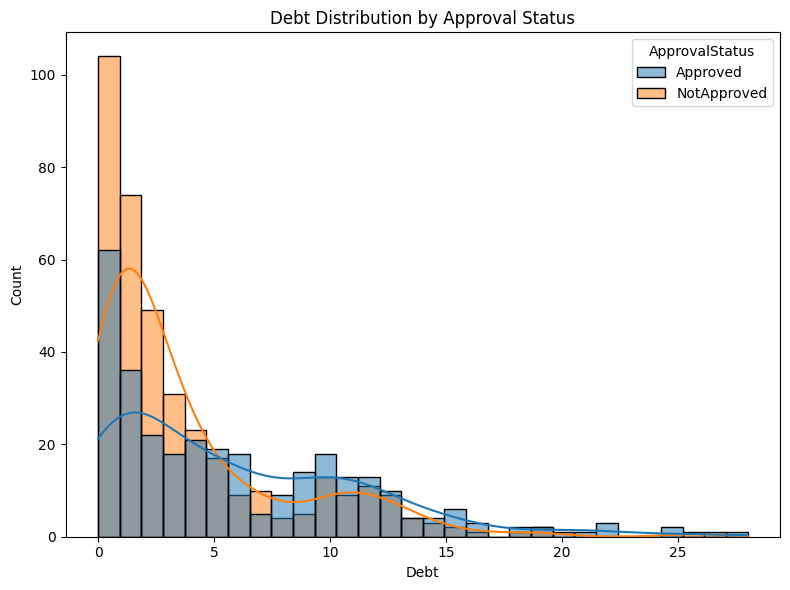

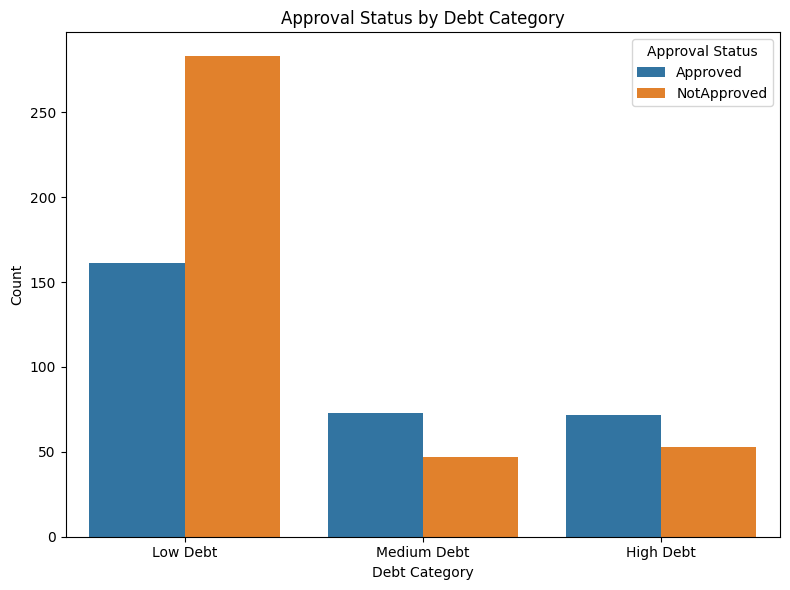

In [35]:
# Plotting Debt distribution by Approval Status
plt.figure(figsize=(8, 6))
sns.histplot(data=credit_data, x='Debt', hue='ApprovalStatus', kde=True, bins=30)
plt.title('Debt Distribution by Approval Status')
plt.xlabel('Debt')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Binning Debt into categories: Low, Medium, High
debt_bins = [0, 5, 10, credit_data['Debt'].max()]
debt_labels = ['Low Debt', 'Medium Debt', 'High Debt']

credit_data['DebtCategory'] = pd.cut(credit_data['Debt'], bins=debt_bins, labels=debt_labels, right=False)

# Plotting the Approval Status across Debt Categories
plt.figure(figsize=(8, 6))
sns.countplot(x=credit_data['DebtCategory'], hue=credit_data['ApprovalStatus'])
plt.title('Approval Status by Debt Category')
plt.xlabel('Debt Category')
plt.ylabel('Count')
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()
